# Práctica 3. Interpolación: El fenómeno de Runge

**Autor:** Arturo Olivares Martos
***

- **Asignatura:** Métodos Numéricos I.
- **Curso Académico:** 2022-23.
- **Grado:** Doble Grado en Ingeniería Informática y Matemáticas.
- **Grupo:** Único.
- **Profesor:** Miguel Ángel Piñar González.
- **Descripción:** Práctica 3 de la asignatura Métodos Numéricos I. Descripción del Fenómeno de Runge.
<!--- **Fecha:** 17 de abril de 2023. -->
<!-- - **Duración:** -->

In [1]:
import numpy as np
import matplotlib.pyplot as plt

El objetivo final de esta práctica es construir el gráfico que ilustra el **fenómeno de Runge**, en el que
se muestra cómo al aumentar el número de puntos de interpolación puede ocurrir que la gráfica del
polinomio de interpolación no se aproxime a la gráfica de la función interpolada.

Se desea construir un gráfico en el que se incluyan la función interpolada
$$f(x)=\frac{1}{1+x^2}$$
y las gráficas de los polinomios de grado $10$, $20$ y $30$ que interpolan a $f$ en puntos equiespaciados del intervalo $[-5,5]$.

## Ejercicio 1
Construya un array que contenga un conjunto de $n$ puntos equiespaciados del intervalo $[−5, 5]$.

El algoritmo se ha realizado de forma escalable, de forma que si se desea modificar el dominio, basta con cambiar el array DOMINIO.

In [2]:
######################################
DOMINIO = np.array([-5, 5])
######################################

def px(n):
    return np.linspace(DOMINIO[0], DOMINIO[1], n)

# Ejemplo para n=5
ejemplo_5_x = px(5)
ejemplo_5_x

array([-5. , -2.5,  0. ,  2.5,  5. ])

## Ejercicio 2
Construya un array que contenga las imágenes mediante $f(x)=\frac{1}{1+x^2}$ de los puntos anteriores.

El algoritmo se ha realizado de forma escalable, de forma que si se desea la función a interpolar, basta con cambiar la definición de $f$.

In [3]:
def f(x):
    return 1/(1+x**2)


# Ejemplo para n=10
ejemplo_5_y=f(ejemplo_5_x)
ejemplo_5_y

array([0.03846154, 0.13793103, 1.        , 0.13793103, 0.03846154])

## Ejercicio 3
Construya una función en Python que a partir de los arrays anteriores calcule la tabla de diferencias divididas. Dicha función debe devolver sólo los coeficientes del polinomio de interpolación en su forma de Newton.

In [4]:
def calc_dif_div (px, py):
    n = len(px)
    
    dif_divididas = np.zeros([n,n])
    """
    Definimos dif_divididas[i][k] como f[x_i, ..., x_{i+k}]
    """
    
    # La tabla se va completando por columnas
    
    # En primer lugar, completo las diferencias divididas de solo un término. (columna 0)
    for i in range(n):
        dif_divididas[i][0]=py[i]
    
    # Para las de más de un término, itero sobre k, la diferencia entre el último y el primero de la diferencia dividida.
    # También se puede entender k=nº de términos de la diferencia dividida -1
    # También se puede entender k=nº de términos de la diferencia dividida empezando desde 0
    # En cada iteración se rellena la columna k, al igual que al representarla nosotros a mano
    for k in range(1,n):
        for i in range(0, n-k):
            dif_divididas[i][k] = (dif_divididas[i+1][k-1] - dif_divididas[i][k-1]) / (px[i+k] -px[i])
    
    print (dif_divididas)

    # Los coeficientes son f[0, k], para todo k. Por tanto, nos quedamos con la primera fila.
    return dif_divididas[0]

# Ejemplo para px = [-1, 0, 1], py = [2, 1, 2]    f(x)=x^2+1
#ejemplo_dif_div = calc_dif_div([-2, 0, 1], [2, 1, 2])
ejemplo_dif_div = calc_dif_div([-3,-2,-1,0,1], [-26,9,2,1,6])
ejemplo_dif_div

[[-26.  35. -21.   8.  -2.]
 [  9.  -7.   3.   0.   0.]
 [  2.  -1.   3.   0.   0.]
 [  1.   5.   0.   0.   0.]
 [  6.   0.   0.   0.   0.]]


array([-26.,  35., -21.,   8.,  -2.])

## Ejercicio 4
Construya una función en Python que a partir del array de puntos y del array de coeficientes proporcione el valor del polinomio interpolación de Newton en un punto $x$ mediante el algoritmo de Newton-Horner.

In [5]:
def NewtonHorner (x, puntos_x, coeficientes):
    valor = 0
    
    n = len(coeficientes)
    
    # Itero desde el final hasta el principio, ya que voy desde dentro hacia afuera.
    for i in range (n-1, 0-1, -1):
        valor = valor*(x-puntos_x[i]) + coeficientes[i]
    
    return valor

## Ejercicio 5
Realizar la gráfica pedida.

El algoritmo se ha realizado de forma escalable, de forma que si se desea cambiar los grados de los polinomios de interpolación, basta con cambiar el array GRADOS.

In [6]:
# Número de puntos para que parezcan curvas y no unión de segmentos.
npuntos = 1000;
px_f = px(npuntos)

# Gráfica real de la curva de Agnesí
py_f = f(px_f)

######################################
# Grados de los polinomios a interpolar
GRADOS = np.array([10, 20, 30])
######################################

# Cada fila de la matriz contendrá las imágenes de los npuntos mediante el polinomio de interpolacion
py_grado = np.zeros([len(GRADOS), npuntos])

# Calculo y evalúo el polinomio para cada uno de los grados
for i in range(len(GRADOS)):
    
    # Para cada grado, calculo los datos "previos"
    px_interpolacion_grado_i = px(GRADOS[i]+1)
    py_interpolacion_grado_i = f(px_interpolacion_grado_i)
    
    # Calculo ahora el polinomio de grado grados[i]
    coeficientes_Newton = calc_dif_div(px_interpolacion_grado_i, py_interpolacion_grado_i)
    
    # Una vez tengo el polinomio, lo evalúo en los npuntos
    py_grado[i] = NewtonHorner(px_f, px_interpolacion_grado_i, coeficientes_Newton)

[[ 3.84615385e-02  2.03619910e-02  1.04072398e-02  6.33484163e-03
   4.29864253e-03 -2.03619910e-03 -1.13122172e-03  1.08597285e-03
  -4.29864253e-04  1.13122172e-04 -2.26244344e-05]
 [ 5.88235294e-02  4.11764706e-02  2.94117647e-02  2.35294118e-02
  -5.88235294e-03 -8.82352941e-03  6.47058824e-03 -2.35294118e-03
   5.88235294e-04 -1.13122172e-04  0.00000000e+00]
 [ 1.00000000e-01  1.00000000e-01  1.00000000e-01  4.62592927e-18
  -5.00000000e-02  3.00000000e-02 -1.00000000e-02  2.35294118e-03
  -4.29864253e-04  0.00000000e+00  0.00000000e+00]
 [ 2.00000000e-01  3.00000000e-01  1.00000000e-01 -2.00000000e-01
   1.00000000e-01 -3.00000000e-02  6.47058824e-03 -1.08597285e-03
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 5.00000000e-01  5.00000000e-01 -5.00000000e-01  2.00000000e-01
  -5.00000000e-02  8.82352941e-03 -1.13122172e-03  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.00000000e+00 -5.00000000e-01  1.00000000e-01 -4.62592927e-18
  -5.88235294e-03  

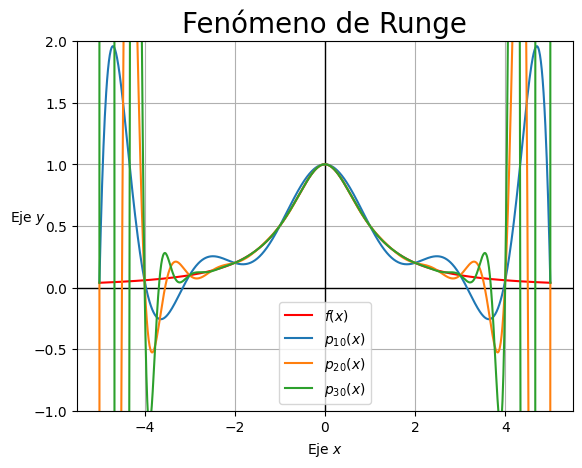

In [7]:
# Represento los ejes
plt.axhline(y=0, color='black', linewidth=1)
plt.axvline(x=0, color='black', linewidth=1)
plt.xlabel('Eje $x$')
plt.ylabel('Eje $y$', rotation=0)

# Represento la función
plt.plot(px_f,py_f, 'r', label='$f(x)$')


# Represento cada grado
for i in range(len(GRADOS)):
    plt.plot(px_f,py_grado[i], label='$p_{'+str(GRADOS[i])+'}(x)$')
    

# Opción para que se acote la imagen
plt.ylim(-1, 2)
 

plt.grid()
plt.title("Fenómeno de Runge", fontsize=20)
plt.legend()
plt.show()
#plt.savefig('grafico.svg')

Le he tenido que añadir el comando `plt.ylim(-1, 2)` para que me acote la imagen en ese intervalo, ya que para valores cercanos a los extremos del intervalo el error se dispara. Este es el conocido como **Fenómeno de Runge**.
